In [1]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%autoreload 2

import _utils as utils

plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
})

<IPython.core.display.Javascript object>

In [2]:
df = utils.read_data('results')

In [3]:
df.scenario.unique()

array(['CEDS', 'SSP2-45-SPA2-V25', 'SSP2-45-SPA2-V25-no',
       'SSP2-Ref-SPA0-V25', 'SSP2-Ref-SPA0-V25-no'], dtype=object)

In [4]:
ceds = df.scenario == 'CEDS'
noover = df.scenario.str.contains('no')
x = df[ceds | noover]
y = df[ceds | ~noover]

In [5]:
def results_plot(x, y, gas, sector, regions=None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()
    regions = regions or '5_regions'
    
    # panel a
    ax = axs[0]
    utils.plot_lines(x, ax=ax, gas=gas, sector=sector, regions=regions, world=False, 
                     unharmonized=True, legend=False, hline=False, colorby='region',
                    fillstyle='full', label_markers=False)
    ax.set_title('Regional Emissions w/o Overrides')
    ax.get_xaxis().get_label().set_visible(False)
    ax.set_ylabel('Mt {}/yr'.format(gas))

    # panel b
    ax = axs[1]
    utils.plot_lines(y, ax=ax, gas=gas, sector=sector, regions=regions, world=False, 
                     unharmonized=True, legend=True, hline=False, colorby='region',
                    fillstyle='full', label_markers=False)
    ax.set_ylim(axs[0].get_ylim())
    ax.set_title('Regional Emissions w/ Overrides')
    ax.get_xaxis().get_label().set_visible(False)

    # panel c
    ax = axs[2]
    utils.plot_lines(x, ax=ax, gas=gas, sector=sector, regions=['World'], 
                     unharmonized=True, legend=False, hline=False,
                    fillstyle='full', label_markers=False)
    ax.set_title('Global Emissions w/o Overrides')
    ax.set_xlabel('Year'.format(gas))
    ax.set_ylabel('Mt {}/yr'.format(gas))
    
    # panel d
    ax = axs[3]
    utils.plot_lines(y, ax=ax, gas=gas, sector=sector, regions=['World'], 
                     unharmonized=True, legend=True, hline=False,
                    fillstyle='full', label_markers=False)
    ax.set_ylim(axs[2].get_ylim())
    ax.set_title('Global Emissions w/ Overrides')
    ax.set_xlabel('Year'.format(gas))
     
    for ax, letter in zip(axs, ['a', 'b', 'c', 'd']):
        ax.text(-0.15, 1.01, letter, transform=ax.transAxes, fontsize=16, fontweight='bold')
        ax.set_ylim([0, None])
    #fig.suptitle('{} emissions in the {}'.format(gas, sector))
    
    plt.tight_layout()
    plt.savefig('../figs/results_{}_{}.pdf'.format(gas, sector).replace(' ', '_'))

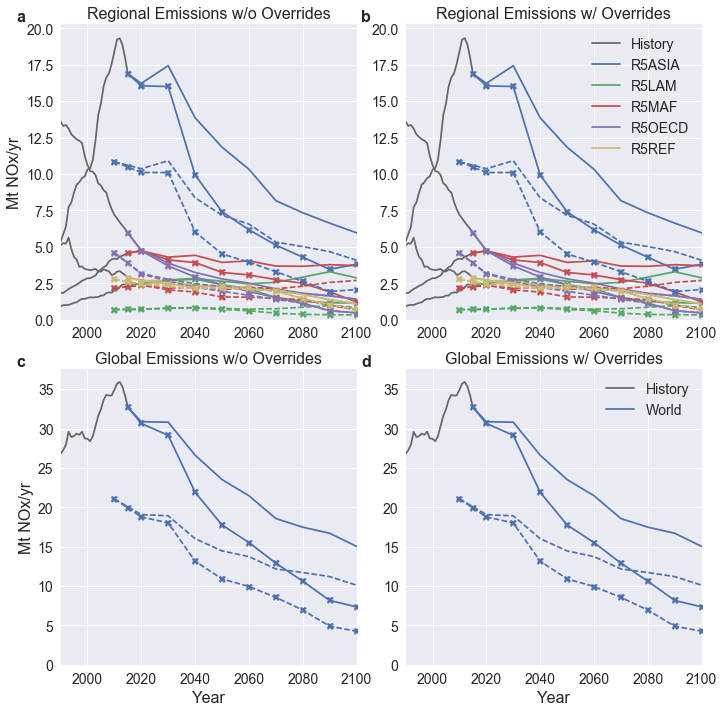

In [6]:
gas = 'NOx'
sector = 'Energy Sector'
results_plot(x, y, gas, sector)

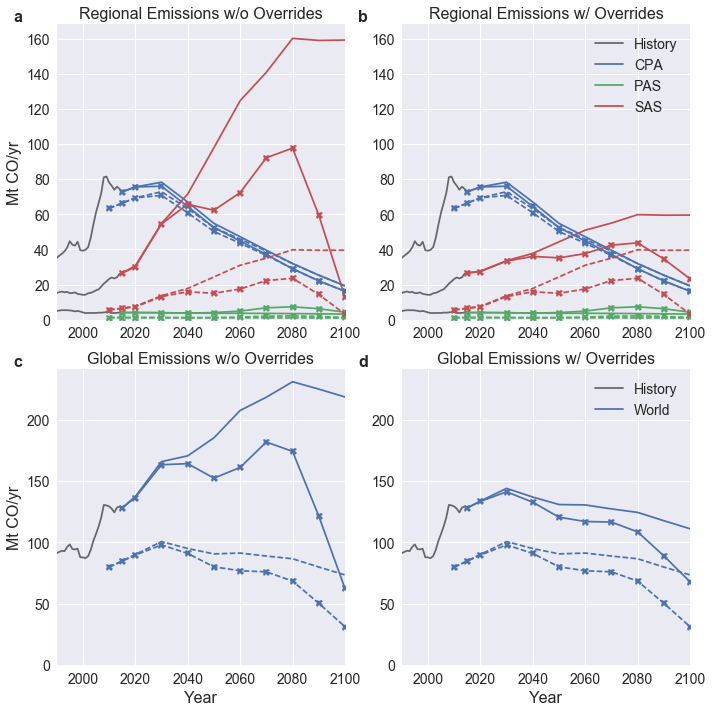

In [7]:
gas='CO'
sector='Industrial Sector'
results_plot(x, y, gas, sector, regions=['CPA', 'SAS', 'PAS'])

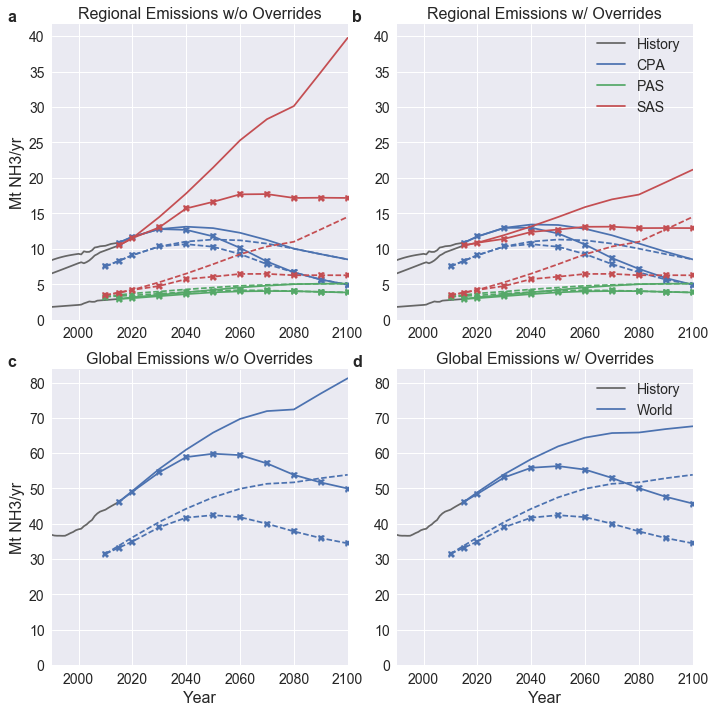

In [8]:
gas='NH3'
sector='Agriculture'
results_plot(x, y, gas, sector, regions=['CPA', 'SAS', 'PAS'])